# Importing the data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged.csv')
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.69Pd0.31


In [36]:
cols = [i for i in df.columns]
# cols

# Splitting the Data

In [37]:
X = df.drop(['critical_temp', 'material'], axis=1)
# X

In [38]:
y = df.critical_temp.values.reshape(-1,1)
# y

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

r2_training = model_linear.score(X_train,y_train)
r2_testing = model_linear.score(X_test, y_test)

print(f'''
Training R^2 Scores: {round(100*r2_training,2)}%
Testing R^2 Scores:  {round(100*r2_testing,2)}%
''')


Training R^2 Scores: 76.42%
Testing R^2 Scores:  76.31%



# XGBoost

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
score 

0.9254150975686546

# XGBoost with Gridsearch

In [9]:
# from sklearn.model_selection import GridSearchCV

# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(regressor,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,
#          y_train)
# print('---------------------------------------------------------------------')
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

# TensorFlow Linear Regression Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
epochs = 100
# def make_model(epochs = 2000):
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mae', 'mse'])

print(model.summary())



# model.fit(
#     X_train,
#     y_train,
#     epochs=epochs,
#     batch_size=512,
#     validation_split=0.1,
# )
    
#     return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               21504     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1

In [12]:
history = model.fit(X_train, y_train, epochs=1, batch_size=512, validation_data=(X_test, y_test))

Train on 17010 samples, validate on 4253 samples
17010/17010 [==============================] - 1s 84us/sample - loss: 214.5420 - mae: 9.5722 - mse: 214.5420 - val_loss: 204.3848 - val_mae: 9.5226 - val_mse: 204.3848


In [13]:
def deep_learning_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    

    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

1000 Epochs

Train on 17010 samples, validate on 4253 samples
Epoch 1/1000
17010/17010 [==============================] - 1s 86us/sample - loss: 186.1476 - mae: 8.8550 - mse: 186.1476 - val_loss: 185.2961 - val_mae: 8.9666 - val_mse: 185.2961
Epoch 2/1000
17010/17010 [==============================] - 1s 86us/sample - loss: 187.3511 - mae: 8.8064 - mse: 187.3511 - val_loss: 191.8953 - val_mae: 9.1120 - val_mse: 191.8953
Epoch 3/1000
17010/17010 [==============================] - 1s 87us/sample - loss: 188.6298 - mae: 8.7968 - mse: 188.6299 - val_loss: 198.9521 - val_mae: 9.4655 - val_mse: 198.9521
Epoch 4/1000
17010/17010 [==============================] - 1s 86us/sample - loss: 178.6825 - mae: 8.5749 - mse: 178.6825 - val_loss: 189.6585 - val_mae: 8.7113 - val_mse: 189.6585
Epoch 5/1000
17010/17010 [==============================] - 1s 86us/sample - loss: 198.5035 - mae: 9.0522 - mse: 198.5035 - val_loss: 237.1358 - val_mae: 10.2127 - val_mse: 237.1358
Epoch 6/1000
17010/17010 [===================

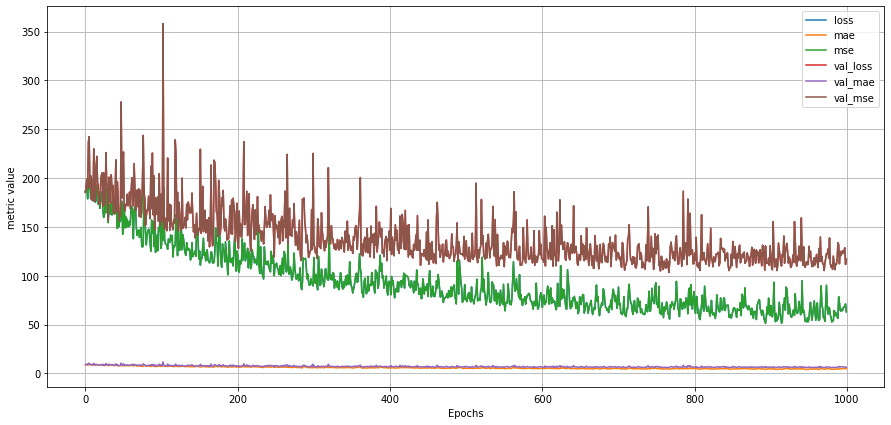

Training MSE: 59.0648
Validation MSE: 117.0583

Training r2: 0.9499
Validation r2: 0.8983


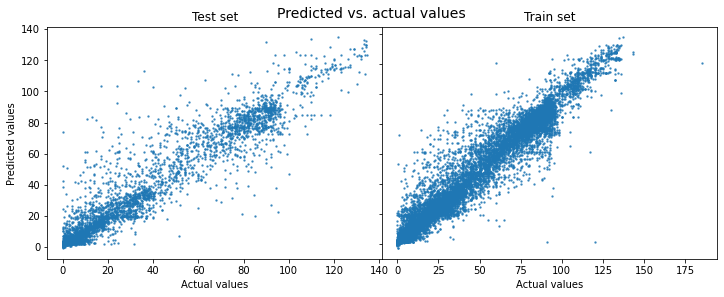

In [18]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=512, validation_data=(X_test, y_test))
pd.DataFrame(history.history).plot(figsize=(15,7))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('metric value')
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
deep_learning_model_evaluation(model=model)

# Optimising with TensorFlow

In [20]:
from tensorflow import keras

In [51]:
def build_model(n_hidden=10, n_neurons=300, learning_rate=3e-3, input_shape=(X_train.shape[1],)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [52]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [58]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]
             )

Train on 17010 samples, validate on 4253 samples
Epoch 1/100
17010/17010 [==============================] - 4s 224us/sample - loss: 2221.9089 - val_loss: 415.3903
Epoch 2/100
17010/17010 [==============================] - 3s 182us/sample - loss: 371.0852 - val_loss: 359.6949
Epoch 3/100
17010/17010 [==============================] - 3s 186us/sample - loss: 345.3933 - val_loss: 435.0678
Epoch 4/100
17010/17010 [==============================] - 3s 171us/sample - loss: 326.6795 - val_loss: 349.5377
Epoch 5/100
17010/17010 [==============================] - 3s 180us/sample - loss: 323.2804 - val_loss: 323.5485
Epoch 6/100
17010/17010 [==============================] - 3s 178us/sample - loss: 321.3426 - val_loss: 260.5724
Epoch 7/100
17010/17010 [==============================] - 3s 190us/sample - loss: 313.5590 - val_loss: 250.0590
Epoch 8/100
17010/17010 [==============================] - 3s 189us/sample - loss: 291.0426 - val_loss: 253.3674
Epoch 9/100
17010/17010 [=====================

In [59]:
mse_test = keras_reg.score(X_test, y_test)

4253/4253 [==============================] - 0s 67us/sample - loss: 252.0070


In [61]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=77, n_hidden=1 ........................................
Train on 11340 samples, validate on 4253 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


11340/11340 [==============================] - 1s 132us/sample - loss: 23525.8898 - val_loss: 1091.6132
Epoch 2/100
11340/11340 [==============================] - 1s 96us/sample - loss: 972.2594 - val_loss: 891.4482
Epoch 3/100
11340/11340 [==============================] - 1s 95us/sample - loss: 1023.8146 - val_loss: 1112.6091
Epoch 4/100
11340/11340 [==============================] - 1s 95us/sample - loss: 965.5811 - val_loss: 649.1529
Epoch 5/100
11340/11340 [==============================] - 1s 94us/sample - loss: 1221.8863 - val_loss: 404.9304
Epoch 6/100
11340/11340 [==============================] - 1s 93us/sample - loss: 923.5230 - val_loss: 9680.9478
Epoch 7/100
11340/11340 [==============================] - 1s 97us/sample - loss: 1125.1898 - val_loss: 693.2957
Epoch 8/100
11340/11340 [==============================] - 1s 93us/sample - loss: 870.8791 - val_loss: 456.7404
Epoch 9/100
11340/11340 [==============================] - 1s 97us/sample - loss: 1314.9297 - val_loss: 320

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s remaining:    0.0s


11340/11340 [==============================] - 2s 132us/sample - loss: 13236.8181 - val_loss: 1310.4629
Epoch 2/100
11340/11340 [==============================] - 1s 97us/sample - loss: 941.2825 - val_loss: 637.2288
Epoch 3/100
11340/11340 [==============================] - 1s 97us/sample - loss: 732.6081 - val_loss: 638.5463
Epoch 4/100
11340/11340 [==============================] - 1s 97us/sample - loss: 1008.0069 - val_loss: 2974.8878
Epoch 5/100
11340/11340 [==============================] - 1s 99us/sample - loss: 1030.5471 - val_loss: 338.7346
Epoch 6/100
11340/11340 [==============================] - 1s 95us/sample - loss: 677.3443 - val_loss: 987.1284
Epoch 7/100
11340/11340 [==============================] - 1s 95us/sample - loss: 1249.0066 - val_loss: 1790.7336
Epoch 8/100
11340/11340 [==============================] - 1s 97us/sample - loss: 695.8595 - val_loss: 843.3962
Epoch 9/100
11340/11340 [==============================] - 1s 94us/sample - loss: 611.5543 - val_loss: 588.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 25.0min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A4A8BF9508>, as the constructor either does not set or modifies parameter n_neurons

In [62]:
rnd_search_cv.best_params_

{'n_neurons': 56, 'n_hidden': 3}

In [63]:
rnd_search_cv.best_score_

-252.37579786333177

In [64]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [65]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [66]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [67]:
model.evaluate(X_test, y_test)

4253/4253 [==============================] - 0s 112us/sample - loss: 117.0583 - mae: 6.2922 - mse: 117.0583


[117.05830064706737, 6.2922287, 117.058304]